# IRIS CLASSIFICATION
The objecive of this dashboard is find the model who best classify the iris dataset.

We will start with a exploration data and then, with all viewed, we are gone a try some models  and find which works the best.

## 1. Loading Data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [3]:
#Run this if you are triying in local and data is in the same folder
df_train = pd.read_csv('train.csv',index_col = 'id')
df_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
id,,,,,
0,5.63,3.05,4.17,1.78,2
1,4.25,3.42,0.26,-0.12,0
2,6.06,3.17,5.49,2.28,2


In [4]:
#Run this code if you are running this code in Kaggle
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# df_train = pd.read_csv('/kaggle/input/iris-m/train.csv')
# df_test = pd.read_csv('/kaggle/input/iris-m/test.csv')
# df_sample_submit = pd.read_csv('/kaggle/input/iris-m/sample_submit.csv')

In [5]:
df_test = pd.read_csv('test.csv',index_col = 'id')
df_test.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
id,,,,
0,6.04,2.76,4.81,1.77
1,4.40,3.44,0.42,-0.24
2,5.13,2.50,3.28,0.77


In [6]:
df_sample_submit = pd.read_csv('sample_submit.csv',index_col='id')
df_sample_submit.head(3)

,target
id,
0,0
1,0
2,0


In [7]:
#By the moment, I'd prefer to have the df_test together
df_test = pd.concat([df_test, df_sample_submit],axis = 1)
df_test.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
id,,,,,
0,6.04,2.76,4.81,1.77,0
1,4.40,3.44,0.42,-0.24,0
2,5.13,2.50,3.28,0.77,0


The dataset says the name of the target types. We are gone a add this column to the datasets.

Target:
* 0 : Setosa
* 1 : Versicolour
* 2 : Virginica

In [8]:
dicc_target_names = {0 : 'Setosa', 1 : 'Versicolour' ,2 : 'Virginica'}
target_names = [dicc_target_names[i] for i in dicc_target_names]

df_train['target_name'] = df_train['target'].map(dicc_target_names)
df_test['target_name'] = df_test['target'].map(dicc_target_names)

## 2. Exploring dataset

In [9]:
features = df_train.columns
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name'],
      dtype='object')

In [10]:
df_train.shape

(450, 6)

In [11]:
df_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.430711,2.847978,2.831933,0.797711,0.982222
std,0.856460,0.449715,1.853399,0.793174,0.828041
min,3.490000,1.720000,-0.630000,-0.650000,0.000000
25%,4.772500,2.570000,0.950000,0.017500,0.000000
50%,5.450000,2.810000,3.340000,0.935000,1.000000
75%,6.007500,3.120000,4.337500,1.410000,2.000000
max,7.800000,4.240000,6.510000,2.320000,2.000000


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 449
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  450 non-null    float64
 1   sepal width (cm)   450 non-null    float64
 2   petal length (cm)  450 non-null    float64
 3   petal width (cm)   450 non-null    float64
 4   target             450 non-null    int64  
 5   target_name        450 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 24.6+ KB


Does the dataset have any Null?

In [13]:
df_train.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

Does the dataset have any duplicated?

In [14]:
df_train.duplicated().sum()

np.int64(2)

In [15]:
df_train[df_train.duplicated() == True]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
id,,,,,,
361,5.04,3.56,0.95,-0.04,0,Setosa
363,4.15,3.06,0.21,-0.40,0,Setosa


Isn't a duplicated

Is the dataset wellbalanced?

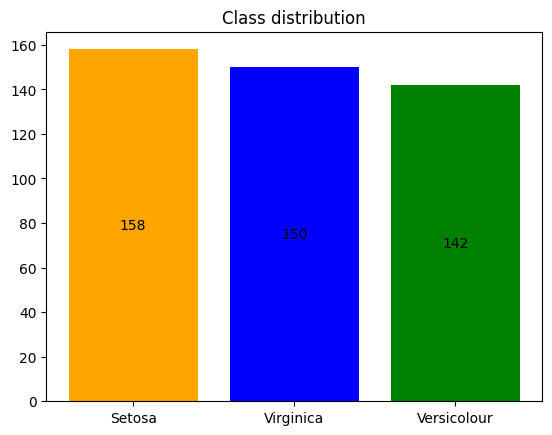

In [16]:
y_g = df_train['target_name'].value_counts()
graph_colors ={0:'orange',1:'blue',2:'green'}

p = plt.bar(x=y_g.index, height = y_g, color = ['orange','blue','green'])
plt.bar_label(p, label_type='center')
plt.title('Class distribution')
plt.show()

Correlation heatmap

Text(0.5, 1.0, 'Correlation matrix')

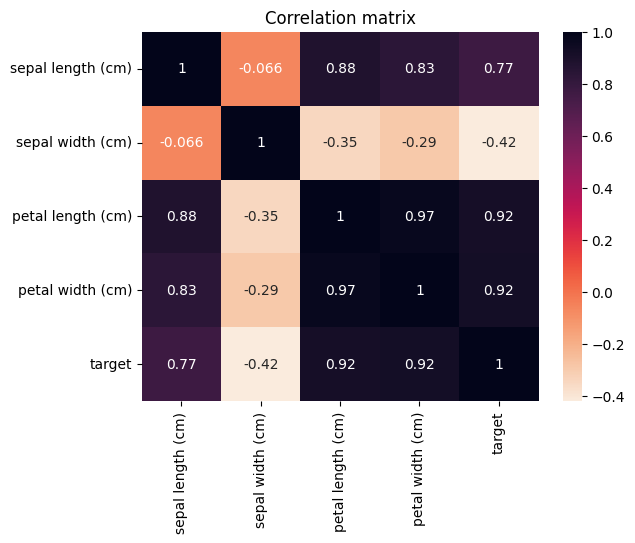

In [17]:
corr_matrix = df_train.iloc[:,:-1].corr()
p = sns.heatmap(corr_matrix, annot = True, cmap ="rocket_r" )
plt.title('Correlation matrix')

C:\Users\danif\AppData\Local\Temp\ipykernel_16636\3919001885.py:18: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(target_names,handles=handles,title="Clases")


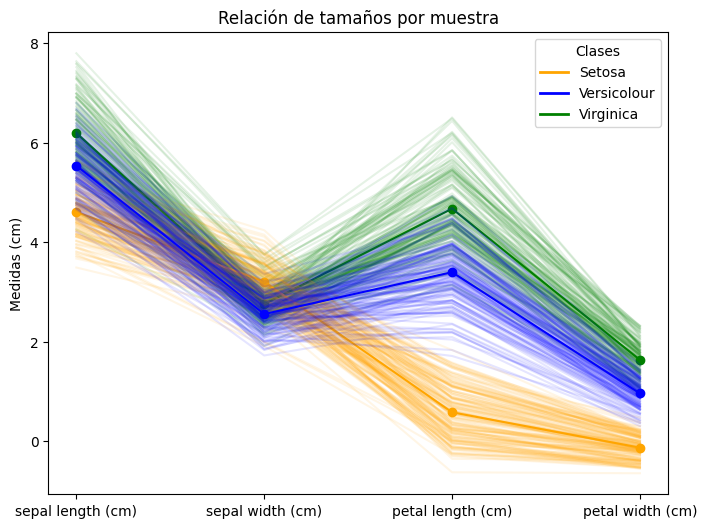

In [18]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(8,6))

features = df_train.columns[:-2]

for cls in df_train['target'].unique():
    subset = df_train[df_train['target'] == cls]
    for i in range(len(subset)):
        ax.plot(features, subset.iloc[i][features], color=graph_colors[cls], alpha=0.1)
    means = np.mean(subset[features],axis = 0)
    ax.plot(features,means[features], color=graph_colors[cls], alpha=1,marker='o')

ax.set_title("Relación de tamaños por muestra")
ax.set_ylabel("Medidas (cm)")

handles = [Line2D([0], [0], color=graph_colors[i], lw=2, label=target_names[i]) for i in range(len(target_names))]
ax.legend(target_names,handles=handles,title="Clases")
plt.show()

We can see that the features with more impact are petal length and petal width. Sepal length does not have much impact, althought is still important and must be taken into account. On the flip side, sepal width seems to be useless and we will probably discard it later.

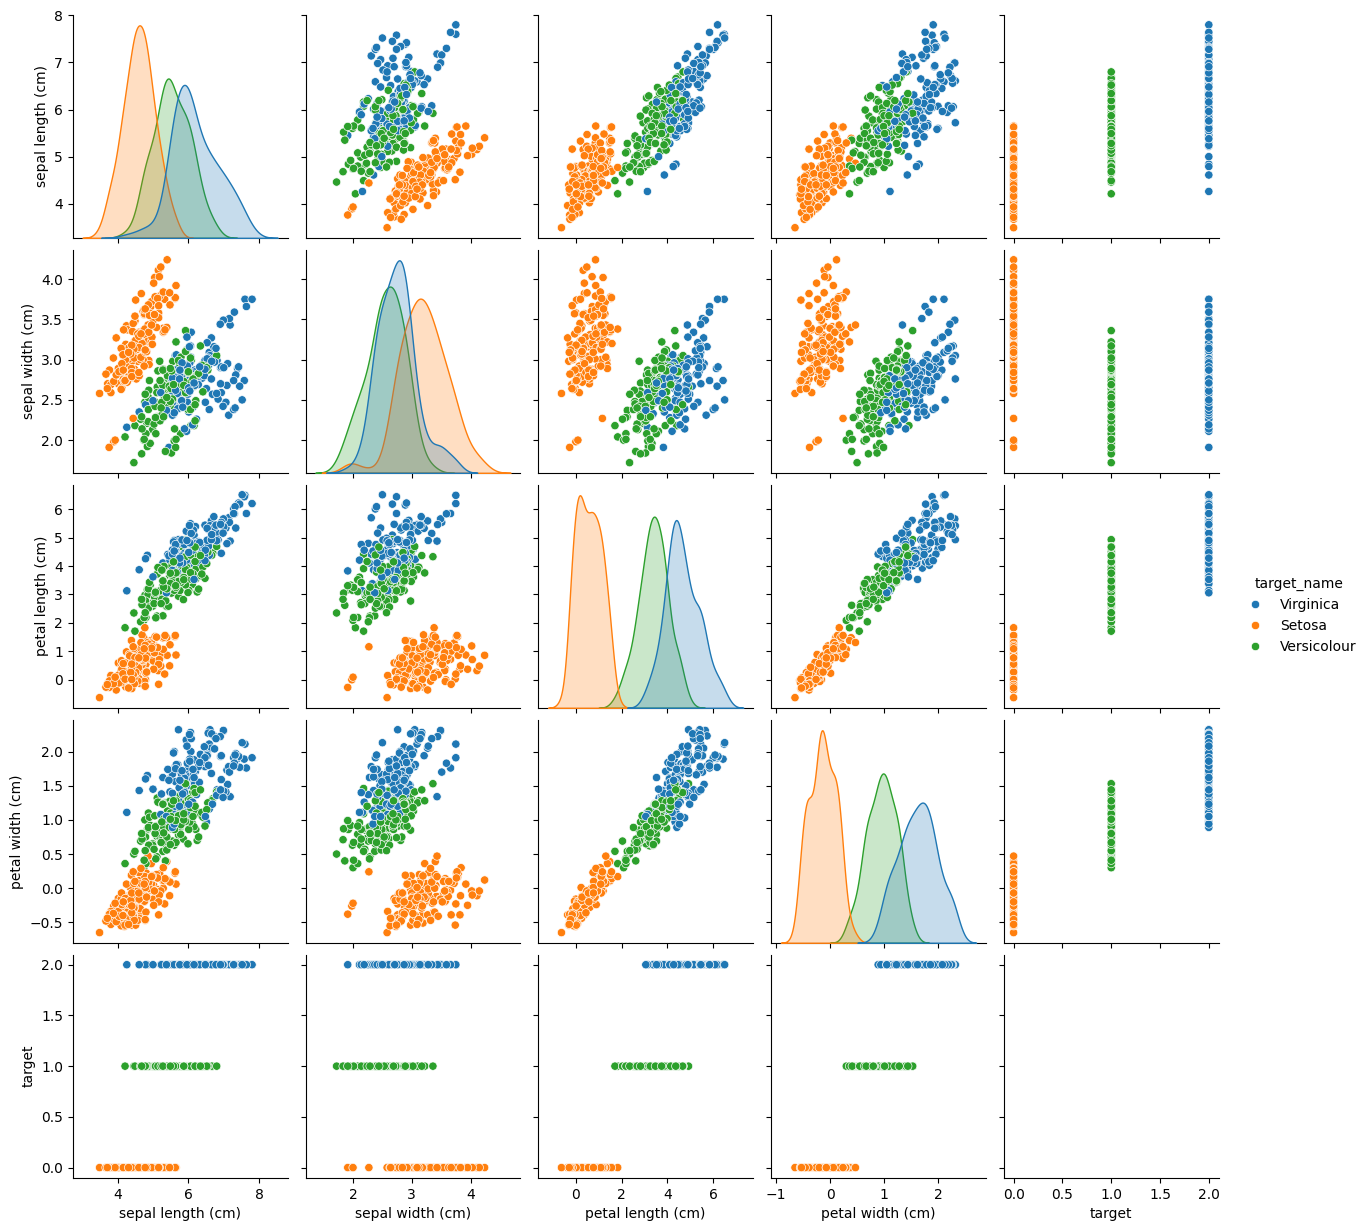

In [19]:
_=sns.pairplot(df_train, hue = 'target_name')

Far from what has been said above, sepal width could be usefull for identify Setosa with SVM or a Regression. Also we can se that there are some outliers that we should study and consider to remove.

Text(0.5, 0.98, 'Setosa outliers')

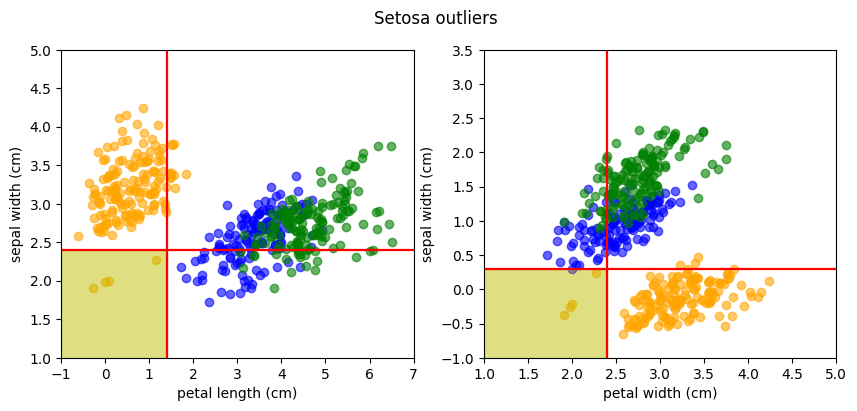

In [20]:
fig, axs = plt.subplots(1,2,figsize = (10,4))
#-------------
ax = axs[0]
for cls in [0,1,2]:
    subset = df_train[df_train['target'] == cls]
    ax.scatter(x=subset['petal length (cm)'],y=subset['sepal width (cm)'],c = graph_colors[cls], alpha = 0.6)
    ax.set_xlabel('petal length (cm)')
    ax.set_ylabel('sepal width (cm)')
    z= np.arange(0,2)
    ax.axhline(y=2.4,color='r',linestyle='-')
    ax.axvline(x=1.4,color='r',linestyle='-')
    ax.fill_between(x = [-1,1.4], y1 = 0, y2=2.4, color = 'y',alpha=0.2)
    ax.set_xlim(-1,7)
    ax.set_ylim(1,5)
    

#-------------
ax = axs[1]
for cls in [0,1,2]:
    subset = df_train[df_train['target'] == cls]
    ax.scatter(y=subset['petal width (cm)'],x=subset['sepal width (cm)'],c = graph_colors[cls], alpha = 0.6)
    ax.set_xlabel('petal width (cm)')
    ax.set_ylabel('sepal width (cm)')
    z= np.arange(0,2)
    ax.axvline(x=2.4,color='r',linestyle='-')
    ax.axhline(y=0.3,color='r',linestyle='-')
    ax.fill_between(x = [-1,2.4], y1 = -1.1, y2=0.3, color = 'y',alpha=0.2)
    ax.set_xlim(1,5)
    ax.set_ylim(-1,3.5)

fig.suptitle('Setosa outliers')

We won't remove the outliers because this outliers could be weird cases but real.

We saw that will be easy to predict setosa. Let's explore more to find the best way to predict the other two classes.
Let's see a 3D plot with the features without "sepal width"

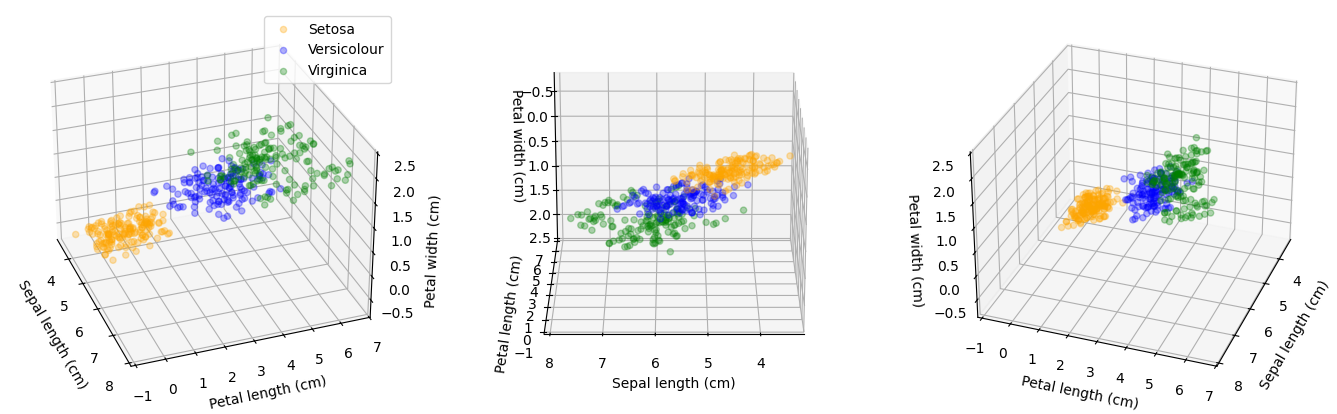

In [21]:

fig, axs = plt.subplots(ncols=3,nrows=1,figsize=(17,8),subplot_kw={'projection':'3d'})
x_angles =[-20,-270,20]
y_angles = [30,200,200]
y_angles = [30,200,30]
for i,angle in enumerate(x_angles):
    ax = axs[i]
    for cls,label in enumerate(target_names):
        subset = df_train[df_train['target'] == cls]
        xs = subset['sepal length (cm)']
        ys = subset['petal length (cm)']
        zs = subset['petal width (cm)']
        
        ax.scatter(xs,ys,zs,
                c= graph_colors[cls],
                label = label,
                alpha=0.3,)
        ax.set_xlabel('Sepal length (cm)')
        ax.set_ylabel('Petal length (cm)')
        ax.set_zlabel('Petal width (cm)')
        ax.view_init(elev=y_angles[i], azim=angle)
        if i == 0:  # solo el primero con leyenda para no repetir
            ax.legend()

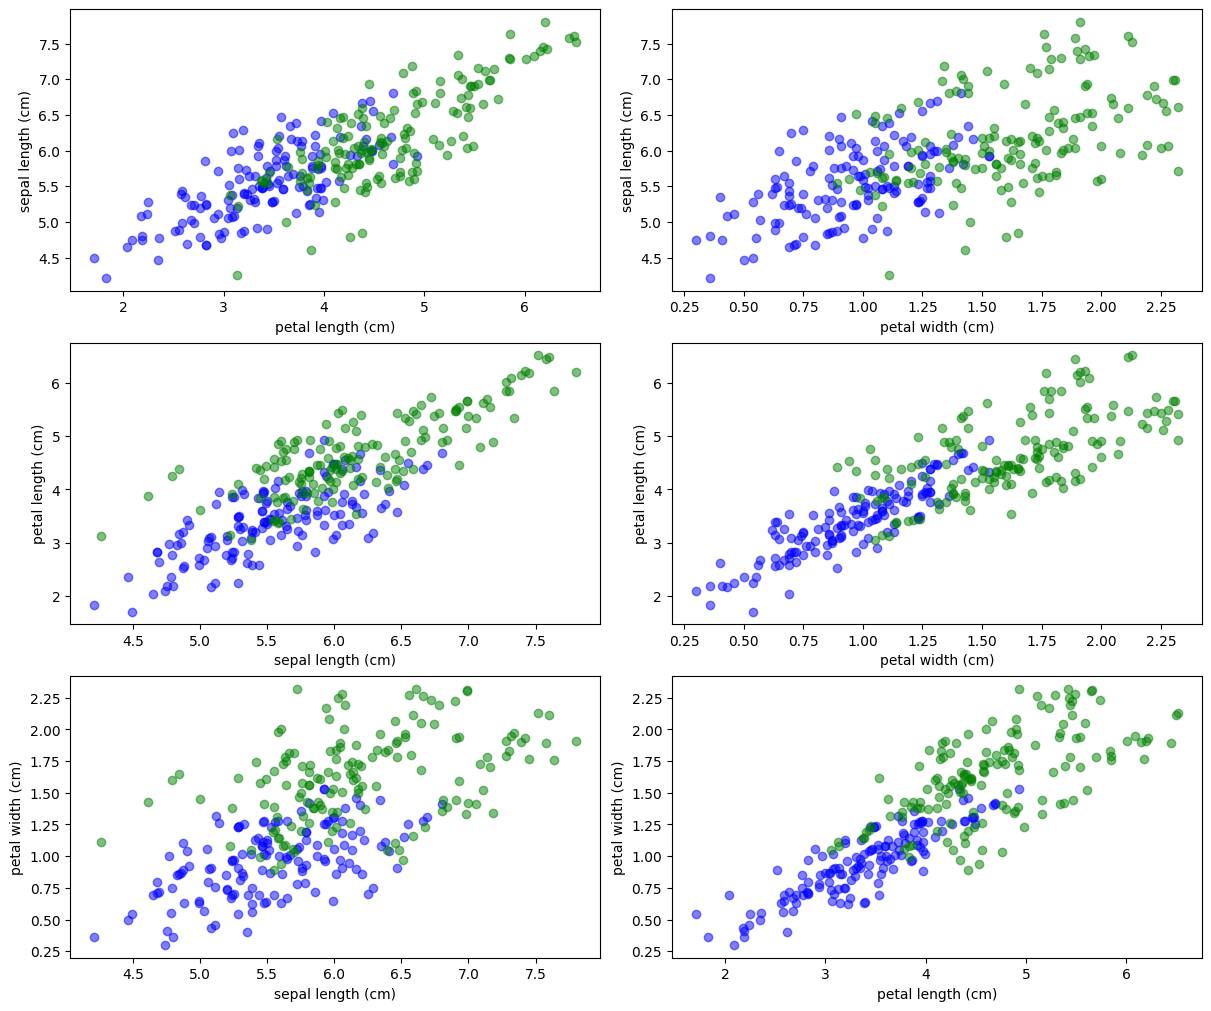

In [22]:
fig, axs = plt.subplots(3,2,figsize=(12,10),layout='constrained')

temp_features = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

for cls in [1,2]:
    for i, feature in enumerate(temp_features):
        features_to_check = temp_features.copy()
        features_to_check.remove(feature)
        for j,checking_feature in enumerate(features_to_check):
            subset = df_train[df_train['target'] == cls]
            ax = axs[i][j]
            ax.scatter(x=subset[checking_feature], y=subset[feature],c=graph_colors[cls],alpha = 0.5)
            ax.set_xlabel(checking_feature)
            ax.set_ylabel(feature)

With a SVM we can easly predict Setosa without using sepal width, so we won't use this feature for training. And we can predict also Versicolour and Virginica. 
By the moment we will exclude sepal width from the training.

## 3. Modeling
We will see how different models work:
* SVM
* Logistic Regression
* KNN
* DT y RF
* Naive Bayes
* XGBoostClassifier

We will do all manual and then we will use RandomizedSearch due to see how it works.

### 3.1 Data preparation

In [23]:
X = df_train.iloc[:,[0,2,3]]
y = df_train.iloc[:,-2]

In [24]:
X.head(2)

,sepal length (cm),petal length (cm),petal width (cm)
id,,,
0,5.63,4.17,1.78
1,4.25,0.26,-0.12


In [25]:
y.head(2)

id
0    2
1    0
Name: target, dtype: int64

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X,y,train_size=0.8)

I prepared this function to be able to evaluate all models.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(model, acccuracy = True, precision = True, recall =True, f1= True, conf_matrix = False):
    y_val_pred = model.predict(X_val)

    if acccuracy:
        print('Accuracy:',accuracy_score(y_val, y_val_pred))
    if precision:
        print('Preccision:',precision_score(y_val,y_val_pred,average='weighted'))
    if recall:
        print('Recall:',recall_score(y_val,y_val_pred,average='weighted'))
    if f1:
        print('F1 score:',f1_score(y_val,y_val_pred,average='weighted'))
    if conf_matrix:
        cm = confusion_matrix(y_val,y_val_pred)
        p = sns.heatmap(cm,annot = True, cmap='Blues')
        plt.show()
    
    


### 3.2 SVM

In [28]:
from sklearn.svm import SVC

param_grid = {
    'kernel' : ['rbf', 'poly','sigmoid' ],
    'C' : [1,50,100,500,1000]
}
svm_grid = GridSearchCV(SVC(random_state=0),param_grid=param_grid)
svm_grid.fit(X_train,y_train )

,estimator,SVC(random_state=0)
,param_grid,"{'C': [1, 50, ...], 'kernel': ['rbf', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


Let's see the decision frontiers.

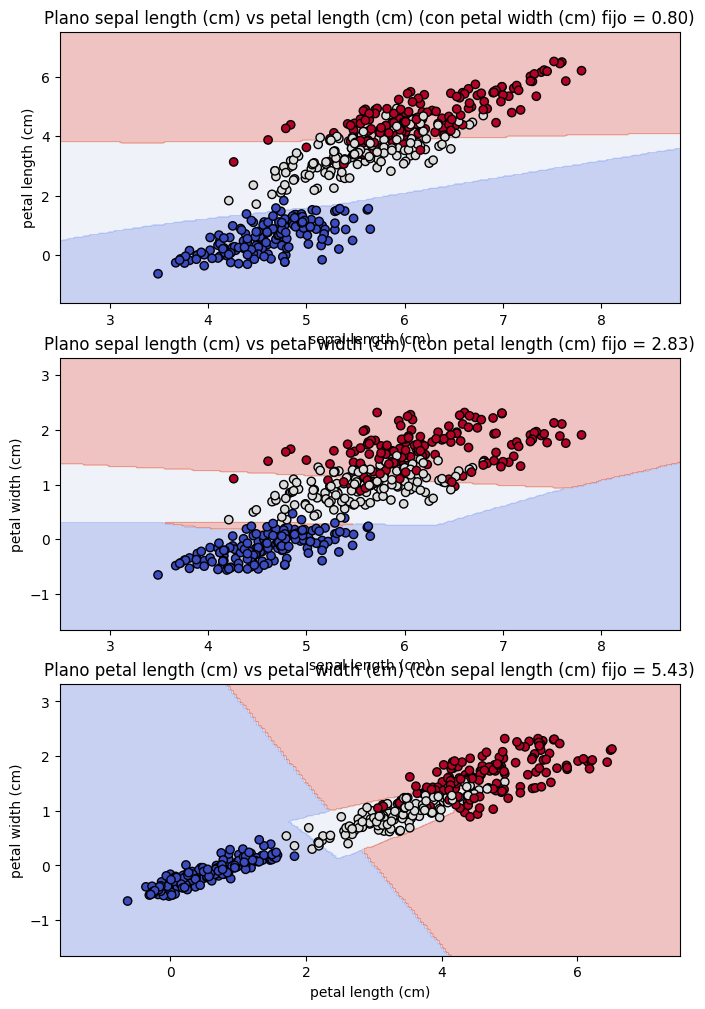

In [29]:
import itertools
trained_features = X.columns.to_list()
pairs = list(itertools.combinations(trained_features, 2))

fig, axs = plt.subplots(3, 1, figsize=(8,12))
for ax, (feat_x,feat_y) in zip(axs, pairs):
    fixed_feat = [f for f in trained_features if f not in (feat_x,feat_y)][0]

    x_min, x_max = X[feat_x].min() - 1, X[feat_x].max() + 1
    y_min, y_max = X[feat_y].min() - 1, X[feat_y].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    z0 = X[fixed_feat].mean()
    grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.size, z0)]

    grid_df = pd.DataFrame(grid, columns=[feat_x,feat_y,fixed_feat])[trained_features]

    Z = svm_grid.best_estimator_.predict(grid_df).reshape(xx.shape)
    
    ax.contourf(xx,yy,Z, alpha = 0.3, cmap = plt.cm.coolwarm)
    ax.scatter(X[feat_x],X[feat_y], c=y, cmap=plt.cm.coolwarm, edgecolors = 'k' )

    ax.set_xlabel(feat_x)
    ax.set_ylabel(feat_y)
    ax.set_title(f"Plano {feat_x} vs {feat_y} (con {fixed_feat} fijo = {z0:.2f})")

plt.show()


Accuracy: 0.9333333333333333
Preccision: 0.9377967711301045
Recall: 0.9333333333333333
F1 score: 0.9329131652661065


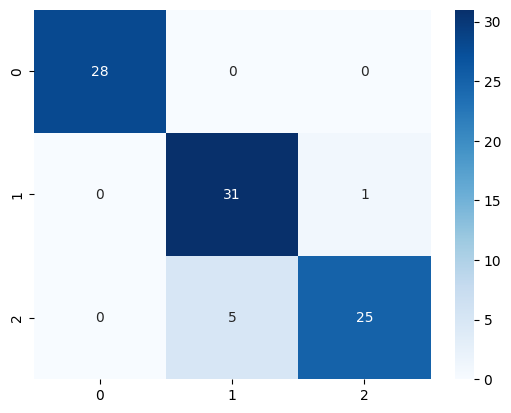

In [30]:
evaluate_model(svm_grid.best_estimator_, conf_matrix=True)

As a result we can see that SVM works quite well.

**Accuracy : 0.9333**

### 3.3 Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty':['l1', 'l2', 'elasticnet', None],
    'class_weight':['balanced'],
    'solver': ['lbfgs','newton-cg'],
    'multi_class':['multinomial'],
    'max_iter':[25,50,75,100]
}

lr_grid = GridSearchCV(LogisticRegression(random_state=0,verbose=0), param_grid=param_grid)
lr_grid.fit(X_train, y_train)

c:\Users\danif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\danif\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 25 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=25).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\danif\AppData\Local\Programs\Python\Python313\Lib\site-pa

,estimator,LogisticRegre...andom_state=0)
,param_grid,"{'class_weight': ['balanced'], 'max_iter': [25, 50, ...], 'multi_class': ['multinomial'], 'penalty': ['l1', 'l2', ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


Let's see the decision frontiers.

[]

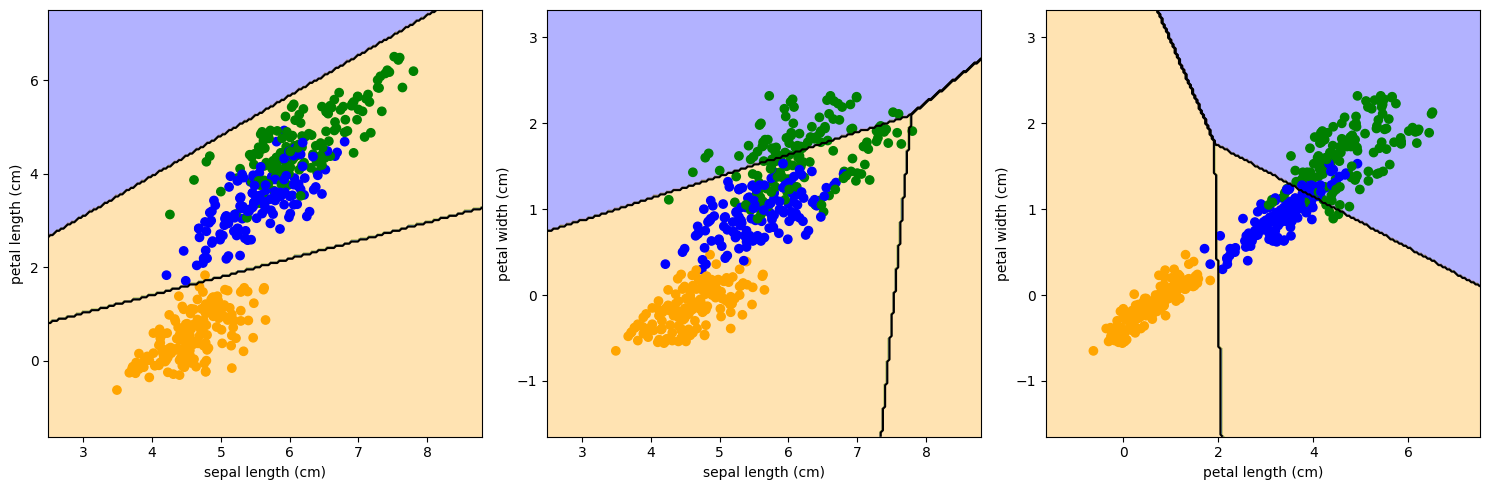

In [32]:
trained_features = X.columns.to_list()
pairs = list(itertools.combinations(trained_features, 2))

fig, axs = plt.subplots(1, 3, figsize = (15,5))

for ax, (feat_x,feat_y) in zip(axs, pairs):
    fixed_feat = [f for f in trained_features if f not in (feat_x,feat_y)][0]

    x_min, x_max = df_train[feat_x].min()-1, df_train[feat_x].max()+1
    y_min, y_max = df_train[feat_y].min()-1, df_train[feat_y].max()+1

    xx,yy = np.meshgrid(np.linspace(x_min,x_max,200),
                        np.linspace(y_min,y_max,200))

    z0 = df_train[fixed_feat].mean()
    grid = np.c_[xx.ravel(), yy.ravel(), np.full(xx.size, z0)]

    df_grid = pd.DataFrame(grid, columns=[feat_x,feat_y,fixed_feat])[trained_features]

    Z = lr_grid.best_estimator_.predict(df_grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx,yy,Z,alpha = 0.3, 
                colors = [graph_colors[c] for c in np.unique(Z)])
    ax.contour(xx,yy,Z,levels=np.unique(Z),colors='k')

    ax.scatter(df_train[feat_x],df_train[feat_y],
               c=[graph_colors[target] for target in df_train.target])

    ax.set_xlabel(feat_x)
    ax.set_ylabel(feat_y)
    

plt.tight_layout()
plt.plot()


Accuracy: 0.9333333333333333
Preccision: 0.9346296296296297
Recall: 0.9333333333333333
F1 score: 0.9333333333333333


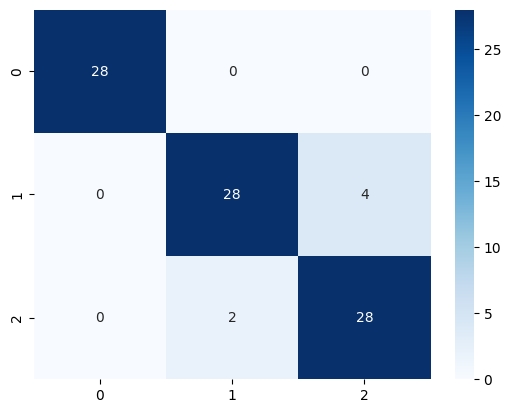

In [33]:
evaluate_model(lr_grid.best_estimator_,conf_matrix=True)

We obtained the same score in all them.

### 3.4 KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

param_grid= {
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'p': [1,2],
}
knn_grid = GridSearchCV(KNeighborsClassifier(n_neighbors=3),param_grid)
knn_grid.fit(X_train,y_train)

,estimator,KNeighborsCla...n_neighbors=3)
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


Accuracy: 0.9222222222222223
Preccision: 0.9224195982816673
Recall: 0.9222222222222223
F1 score: 0.9221613791105315


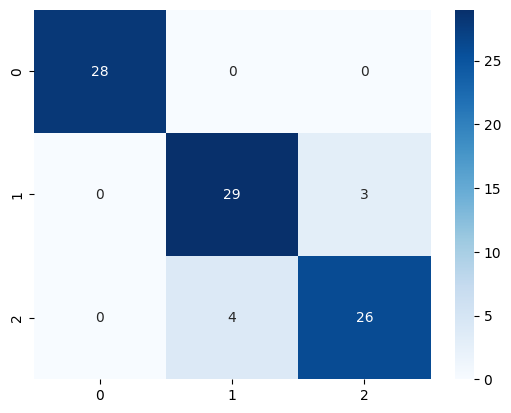

In [35]:
evaluate_model(knn_grid.best_estimator_, conf_matrix=True)

This models work worst than the others, so we are going to discard it.

### 3.5 Random Tree and Random Forest

For this dataset we will try the efficience of using 'sepal width' or not.

#### 3.5.1.1 Decision Tree without Sepal Width

In [36]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth': [1,3,5,7,10,15,20,50],
    'max_leaf_nodes':[5,10,15,20,25,30,50]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid)
dt_grid.fit(X_train, y_train)

,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 3, ...], 'max_leaf_nodes': [5, 10, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [37]:
evaluate_model(dt_grid.best_estimator_)

Accuracy: 0.9333333333333333
Preccision: 0.9377967711301045
Recall: 0.9333333333333333
F1 score: 0.9329131652661065


In [38]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [6,7,8,9],
    'max_leaf_nodes':[6,7,8,9,10,11,12,13,14]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0,splitter='best',criterion='gini'),param_grid)
dt_grid.fit(X_train, y_train)

,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'max_depth': [6, 7, ...], 'max_leaf_nodes': [6, 7, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


Accuracy: 0.9333333333333333
Preccision: 0.9377967711301045
Recall: 0.9333333333333333
F1 score: 0.9329131652661065


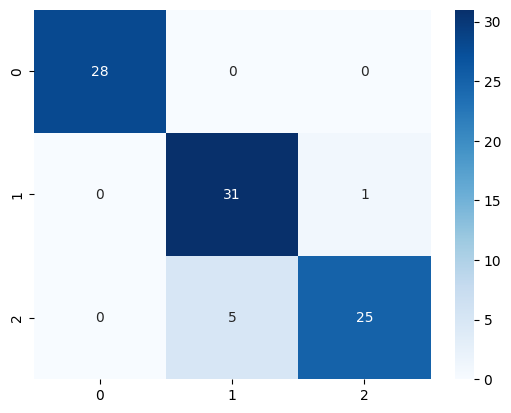

In [39]:
evaluate_model(dt_grid.best_estimator_,conf_matrix=True)

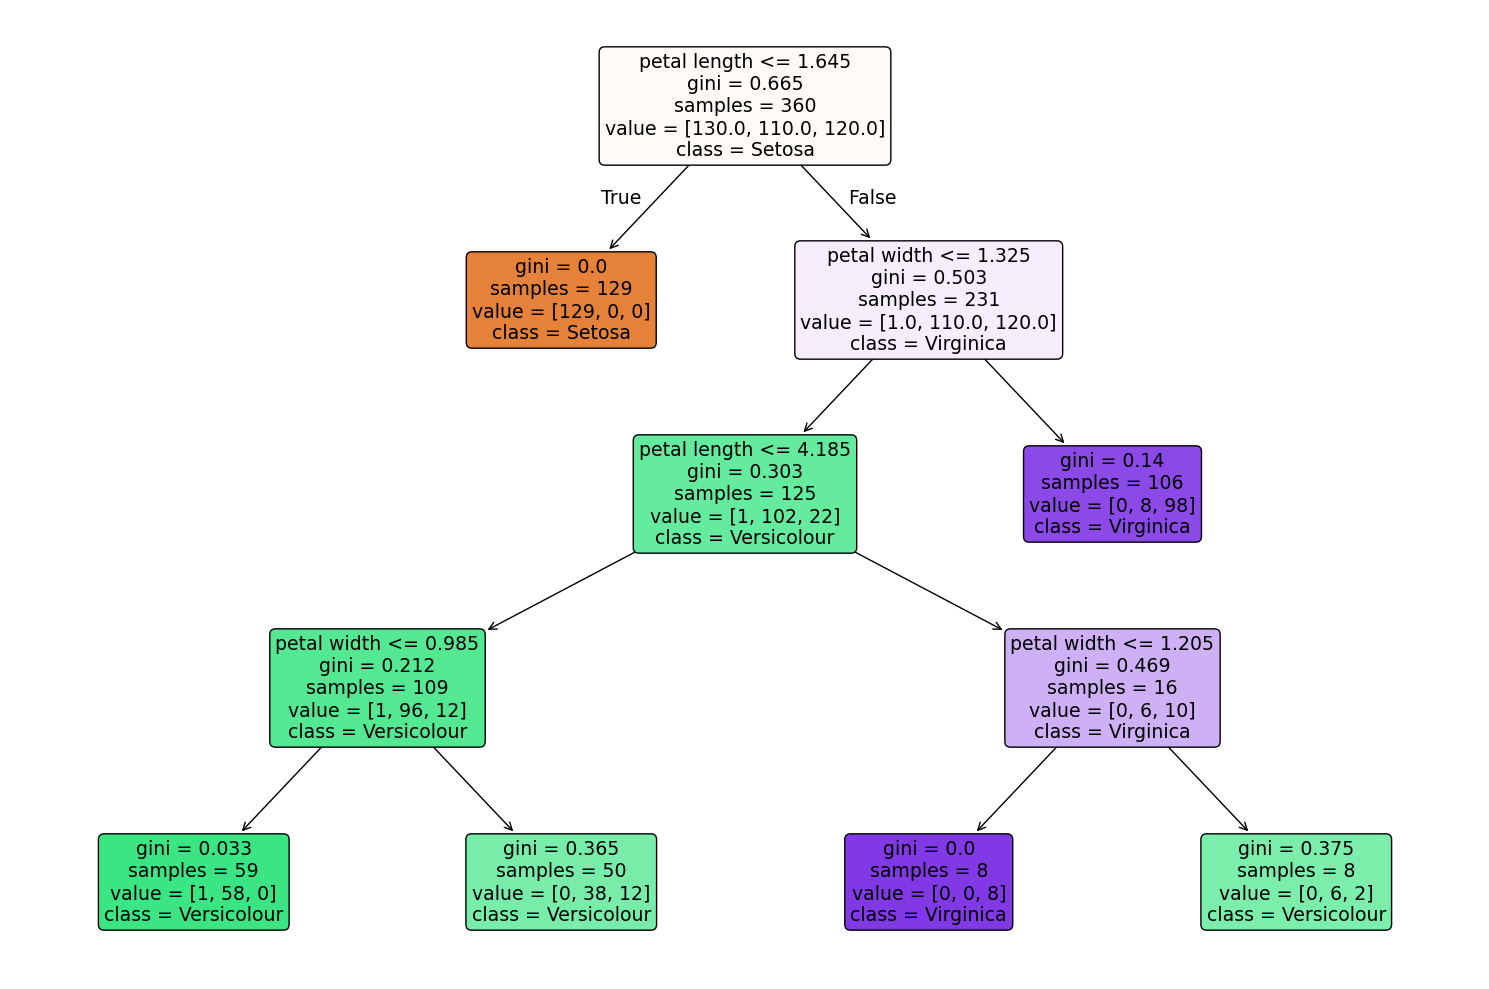

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
tree.plot_tree(dt_grid.best_estimator_, 
               feature_names=['sepal length', 'petal length', 'petal width'], 
               class_names=target_names, 
               filled=True,rounded=True)
plt.tight_layout()
plt.show()

#### 3.5.1.2 Random Forest without Sepal Width

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.9222222222222223
Preccision: 0.9224195982816673
Recall: 0.9222222222222223
F1 score: 0.9221613791105315


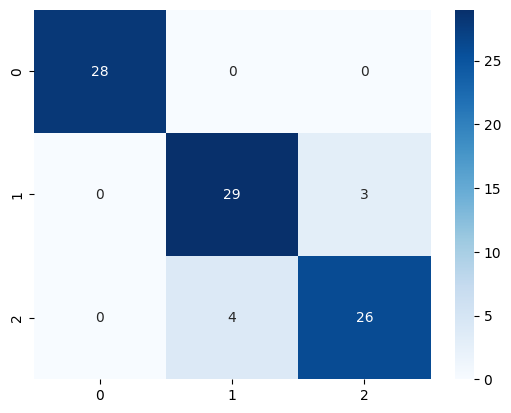

In [42]:
evaluate_model(rf, conf_matrix=True)

By the moment, this is the best model we trained.

#### 3.5.2.1 Decision Tree with Sepal Width

Setting Data

In [43]:
X_w_se = df_train.iloc[:,:4]
y_w_se = df_train.iloc[:,-2]

X_w_train, X_w_val, y_w_train, y_w_val = train_test_split(X_w_se,y_w_se,train_size=0.8)

In [44]:
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth': [1,3,5,7,10,15,20,50],
    'max_leaf_nodes':[5,10,15,20,25,30,50]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid)
dt_grid.fit(X_w_train, y_w_train)

,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [1, 3, ...], 'max_leaf_nodes': [5, 10, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [45]:
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth': [6,7,8,9],
    'max_leaf_nodes':[16,17,18,19,20,21,22,23,24]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0),param_grid)
dt_grid.fit(X_w_train, y_w_train)

,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [6, 7, ...], 'max_leaf_nodes': [16, 17, ...], 'splitter': ['best', 'random']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


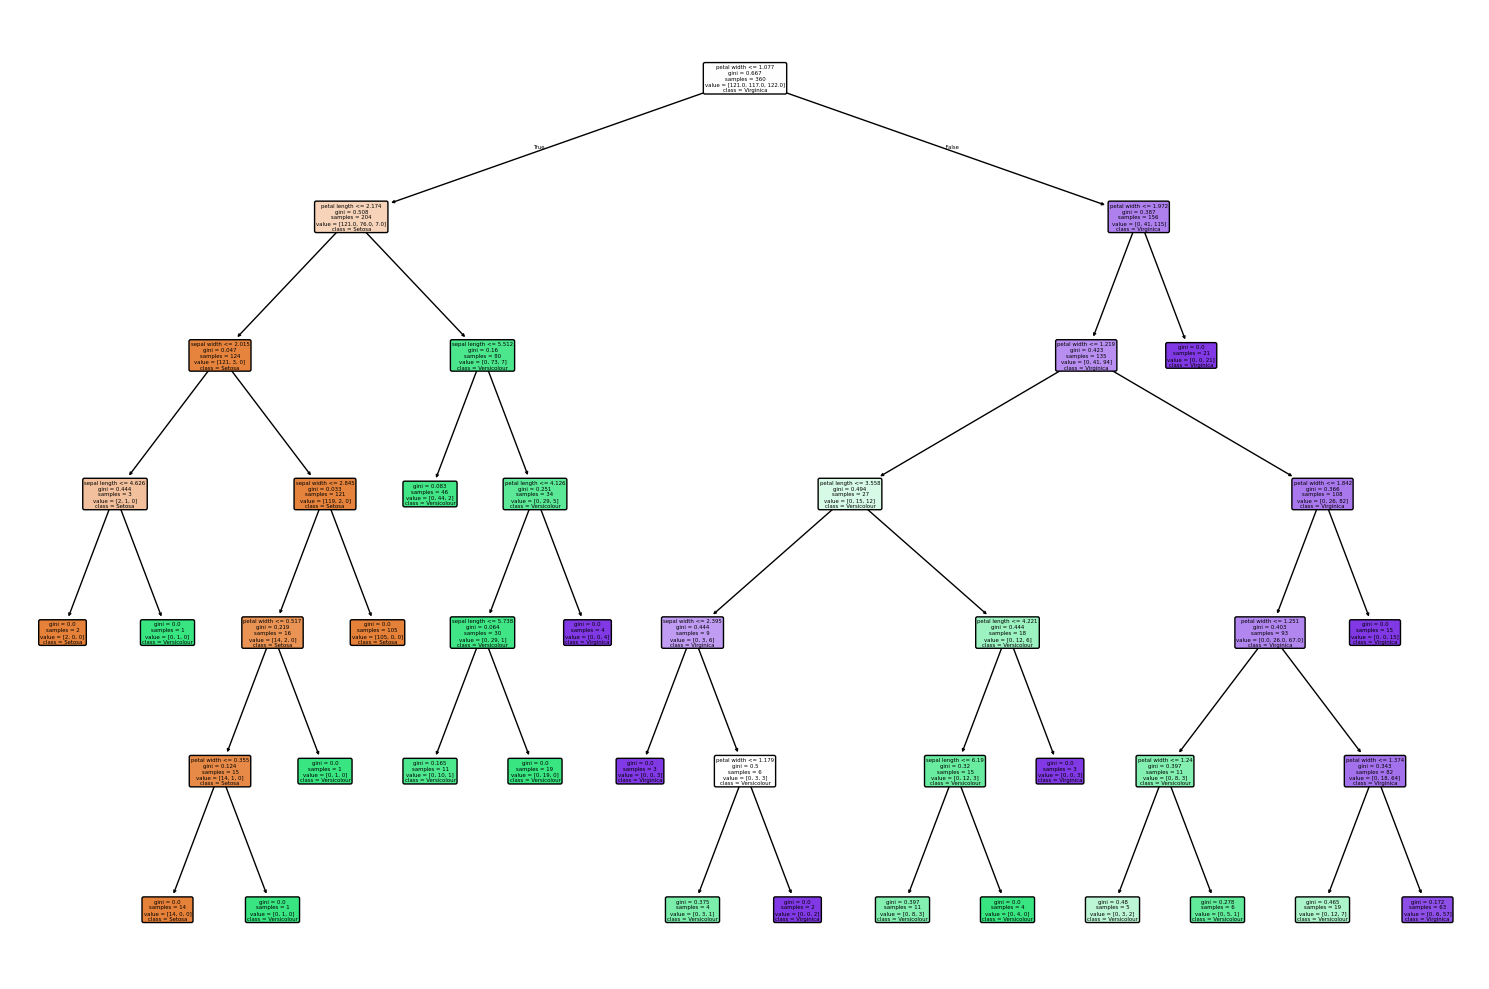

In [46]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_grid.best_estimator_, 
               feature_names=['sepal length','sepal width', 'petal length', 'petal width'], 
               class_names=target_names, 
               filled=True,rounded=True)
plt.tight_layout()
plt.show()

Accuracy: 0.9222222222222223
Preccision: 0.9255079365079365
Recall: 0.9222222222222223
F1 score: 0.9222222222222223


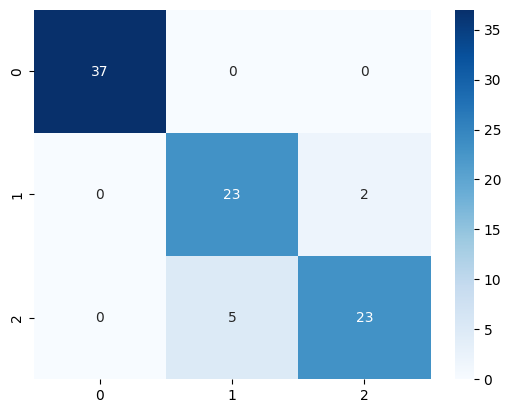

In [47]:
y_val_pred = dt_grid.best_estimator_.predict(X_w_val)
print('Accuracy:',accuracy_score(y_w_val, y_val_pred))
print('Preccision:',precision_score(y_w_val,y_val_pred,average='weighted'))
print('Recall:',recall_score(y_w_val,y_val_pred,average='weighted'))
print('F1 score:',f1_score(y_w_val,y_val_pred,average='weighted'))
cm = confusion_matrix(y_w_val,y_val_pred)
p = sns.heatmap(cm,annot = True, cmap='Blues')
plt.show()

#### 3.5.2.2 Random Forest with Sepal Width

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_w_train, y_w_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.9666666666666667
Preccision: 0.9669699872286078
Recall: 0.9666666666666667
F1 score: 0.9666189282730635


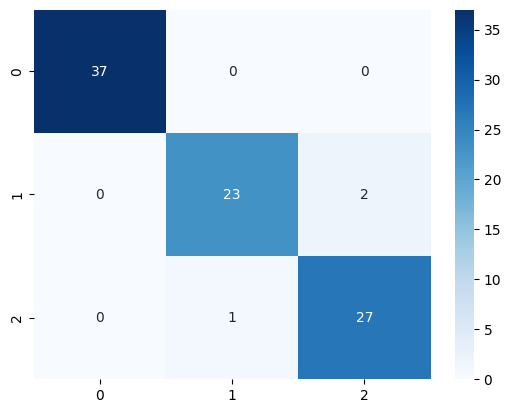

In [49]:
y_val_pred = rf.predict(X_w_val)
print('Accuracy:',accuracy_score(y_w_val, y_val_pred))
print('Preccision:',precision_score(y_w_val,y_val_pred,average='weighted'))
print('Recall:',recall_score(y_w_val,y_val_pred,average='weighted'))
print('F1 score:',f1_score(y_w_val,y_val_pred,average='weighted'))
cm = confusion_matrix(y_w_val,y_val_pred)
p = sns.heatmap(cm,annot = True, cmap='Blues')
plt.show()

By the moment the best classifier still being the RF without sepañ width.

### 3.6 Naive Bayes


In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

,priors,None
,var_smoothing,1e-09


Accuracy: 0.9333333333333333
Preccision: 0.9343604108309991
Recall: 0.9333333333333333
F1 score: 0.9331940090560781


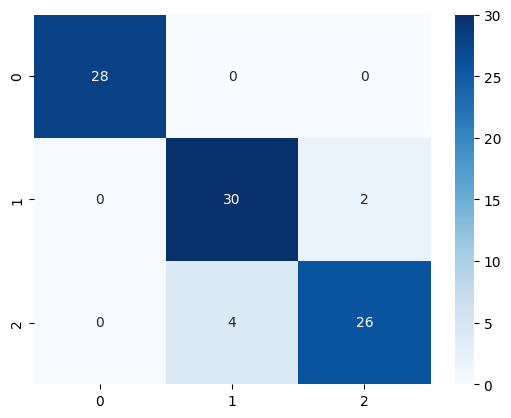

In [51]:
evaluate_model(gnb,conf_matrix=True)

### 3.7 XGBoost Classifier

In [52]:
from xgboost import XGBClassifier
param_grid = {
    'n_estimators':[50,100,200],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01,0.1,0.2]
}
xgb_clf_grid = GridSearchCV(XGBClassifier(eval_metric ='logloss'),param_grid=param_grid)
xgb_clf_grid.fit(X_train,y_train)

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'multi:softprob'


Accuracy: 0.9333333333333333
Preccision: 0.9377967711301045
Recall: 0.9333333333333333
F1 score: 0.9329131652661065


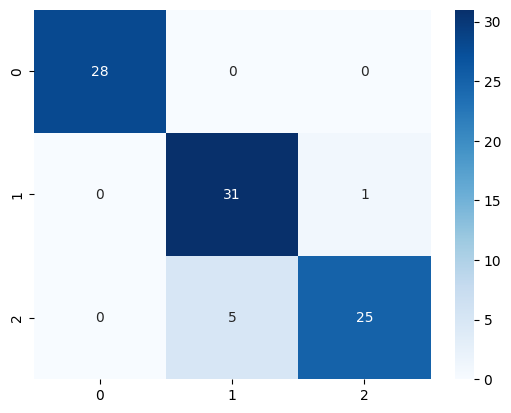

In [53]:
evaluate_model(xgb_clf_grid.best_estimator_,conf_matrix=True)

## 4.Testing and selecting one of the best models

These are the models which have performed the best.
Now we are going to retrain with all the train data, without validation data, and test with df_test. Let's see how they work.

In [54]:
best_models = {
    'svm': SVC(random_state=0, C=1000,kernel='rbf'),
    'rf':RandomForestClassifier(n_estimators=100,random_state=0),
    'NV':GaussianNB(),
    'xgboost':XGBClassifier(objective ='multi:softprob',eval_metric = 'logloss',learning_rate = 0.01, max_depth = 7, n_estimators=50)
}

Testing svm-----
Accuracy: 0.9288888888888889
Preccision: 0.928963129796463
Recall: 0.9288888888888889
F1 score: 0.9288989012478945


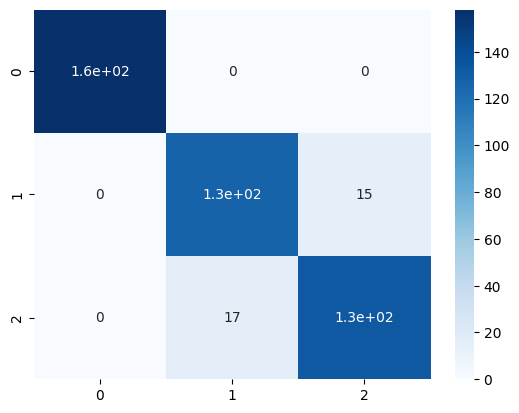

Testing rf-----
Accuracy: 1.0
Preccision: 1.0
Recall: 1.0
F1 score: 1.0


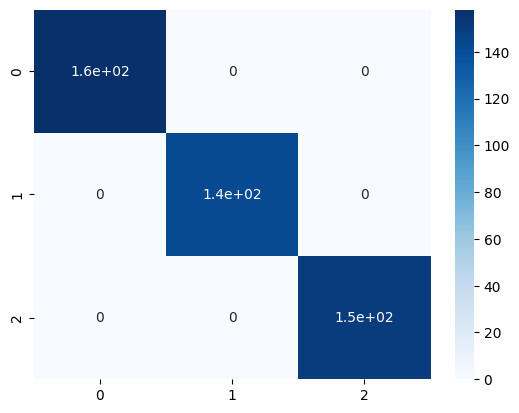

Testing NV-----
Accuracy: 0.9022222222222223
Preccision: 0.9019583711900567
Recall: 0.9022222222222223
F1 score: 0.9018442245477278


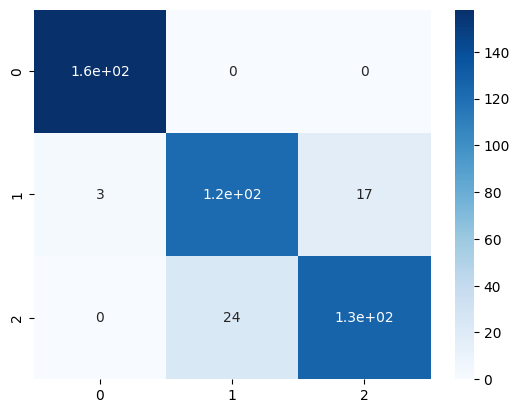

Testing xgboost-----
Accuracy: 0.9666666666666667
Preccision: 0.9668083509265775
Recall: 0.9666666666666667
F1 score: 0.9666725325261911


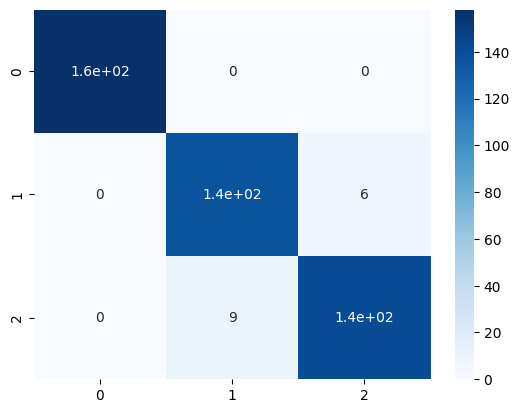

In [55]:
def_X_train = pd.concat([X_train,X_val])
def_y_train = pd.concat([y_train, y_val])

# X_test = df_test.iloc[:,[0,2,3]]
# y_test = df_test.iloc[:,-2]
for model_key in best_models:
    print(f'Testing {model_key}-----')
    model = best_models[model_key]
    model.fit(def_X_train,def_y_train)

    y_pred = model.predict(def_X_train)
    print('Accuracy:',accuracy_score(def_y_train, y_pred))
    print('Preccision:',precision_score(def_y_train,y_pred,average='weighted'))
    print('Recall:',recall_score(def_y_train,y_pred,average='weighted'))
    print('F1 score:',f1_score(def_y_train,y_pred,average='weighted'))
    cm = confusion_matrix(def_y_train,y_pred)
    p = sns.heatmap(cm,annot = True, cmap='Blues')
    plt.show()
    

    

    


# 5.Conclusion

It's normal that Random forest gets a 1 accuracy when we predict the training data, but not for this we can discard it. 
The two best classifiers are Random Forest and XGBoost.